In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import datetime as dt
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_csv("/content/customer_data (1).csv")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#Now I will create some new features in the dataset to define the customer personalities as a part of data preparation:



In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df=data.fillna(data["Income"].mean())

In [7]:
#drop un unusual columns
df=df.drop("Z_CostContact",axis=1)

In [8]:
df=df.drop("Z_Revenue",axis=1)


In [9]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [10]:
df.Marital_Status.replace({"Alone":"Single","Widow":"Single","Absurd":"Single","YOLO":"Single","Divorced":"Single","Together":"Married"},inplace=True)

In [11]:
df["Marital_Status"].value_counts()

Married    1444
Single      796
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

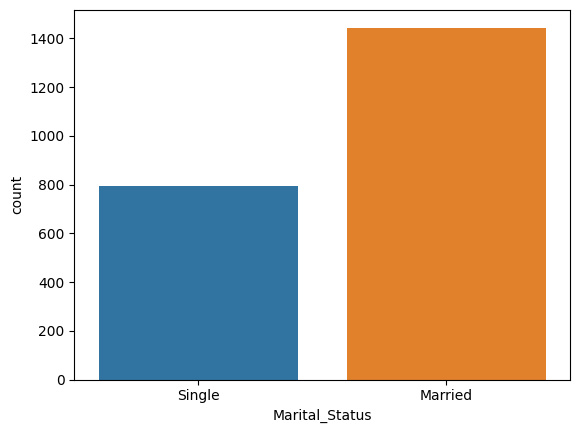

In [12]:
sns.countplot(x="Marital_Status",data=df)

In [13]:
df["TotalChildren"]=df["Kidhome"]+df["Teenhome"]

In [14]:
df2=df.drop(columns=["Kidhome","Teenhome"])
df=df2
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren
0,5524,1957,Graduation,Single,58138.0,04/09/12,58,635,88,546,...,4,7,0,0,0,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,08/03/14,38,11,1,6,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,Graduation,Married,71613.0,21/08/13,26,426,49,127,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduation,Married,26646.0,10/02/14,26,11,4,20,...,4,6,0,0,0,0,0,0,0,1
4,5324,1981,PhD,Married,58293.0,19/01/14,94,173,43,118,...,6,5,0,0,0,0,0,0,0,1


In [15]:
df.Marital_Status.replace({"Single":0,"Married":1},inplace=True)

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren
0,5524,1957,Graduation,0,58138.0,04/09/12,58,635,88,546,...,4,7,0,0,0,0,0,0,1,0
1,2174,1954,Graduation,0,46344.0,08/03/14,38,11,1,6,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,Graduation,1,71613.0,21/08/13,26,426,49,127,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduation,1,26646.0,10/02/14,26,11,4,20,...,4,6,0,0,0,0,0,0,0,1
4,5324,1981,PhD,1,58293.0,19/01/14,94,173,43,118,...,6,5,0,0,0,0,0,0,0,1


In [17]:
df['Age']=2023-df['Year_Birth']

In [18]:
df2=df.drop(columns=["Year_Birth"])

In [19]:
df2.Education.replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'},inplace=True)


In [20]:
df2.Education.replace({"Undergraduate":0,"Postgraduate":1},inplace=True)


In [22]:
df2['Education'].value_counts()

1    1983
0     257
Name: Education, dtype: int64

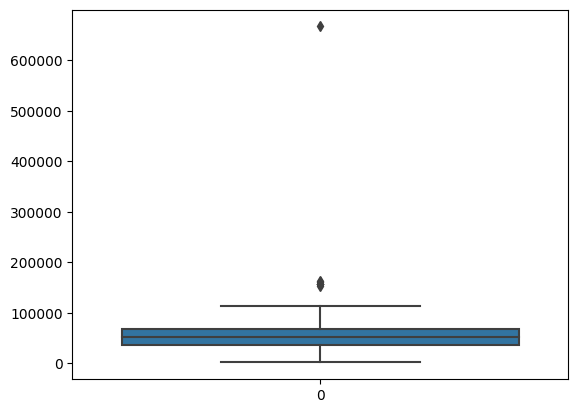

In [23]:
sns.boxplot(df2["Income"])
plt.show()

In [24]:
data=df2

In [25]:

data=data.dropna(subset=['Income'])
data=data[data['Income']<600000]


In [26]:
data.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren,Age
0,5524,1,0,58138.0,04/09/12,58,635,88,546,172,...,7,0,0,0,0,0,0,1,0,66
1,2174,1,0,46344.0,08/03/14,38,11,1,6,2,...,5,0,0,0,0,0,0,0,2,69
2,4141,1,1,71613.0,21/08/13,26,426,49,127,111,...,4,0,0,0,0,0,0,0,0,58
3,6182,1,1,26646.0,10/02/14,26,11,4,20,10,...,6,0,0,0,0,0,0,0,1,39
4,5324,1,1,58293.0,19/01/14,94,173,43,118,46,...,5,0,0,0,0,0,0,0,1,42


In [27]:
data.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
TotalChildren          0
Age                    0
dtype: int64

<Axes: >

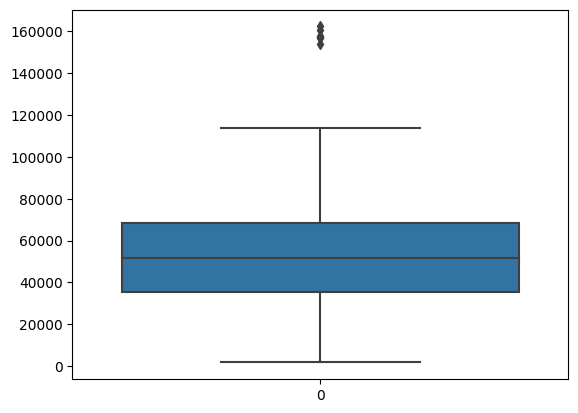

In [28]:
sns.boxplot(data["Income"])

In [29]:
data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']


In [31]:
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
data.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren,Age,Spending
0,5524,1,0,58138.0,04/09/12,58,635,88,546,172,...,0,0,0,0,0,0,1,0,66,1617
1,2174,1,0,46344.0,08/03/14,38,11,1,6,2,...,0,0,0,0,0,0,0,2,69,27
2,4141,1,1,71613.0,21/08/13,26,426,49,127,111,...,0,0,0,0,0,0,0,0,58,776
3,6182,1,1,26646.0,10/02/14,26,11,4,20,10,...,0,0,0,0,0,0,0,1,39,53
4,5324,1,1,58293.0,19/01/14,94,173,43,118,46,...,0,0,0,0,0,0,0,1,42,422


In [32]:
##Seniority variable creation
last_date = date(2023,4,4)

In [33]:
data['Seniority']=pd.to_datetime(data['Dt_Customer'])

In [34]:
data['Seniority']=pd.to_datetime(data['Seniority'], dayfirst=True,format = '%Y-%m-%d')

In [35]:
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30



In [36]:
data['Seniority']

0       133.733333
1       105.533333
2       117.100000
3       103.533333
4       112.066667
           ...    
2235    119.400000
2236    103.400000
2237    111.866667
2238    111.900000
2239    127.433333
Name: Seniority, Length: 2239, dtype: float64

In [37]:
data.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren,Age,Spending,Seniority
0,5524,1,0,58138.0,04/09/12,58,635,88,546,172,...,0,0,0,0,0,1,0,66,1617,133.733333
1,2174,1,0,46344.0,08/03/14,38,11,1,6,2,...,0,0,0,0,0,0,2,69,27,105.533333
2,4141,1,1,71613.0,21/08/13,26,426,49,127,111,...,0,0,0,0,0,0,0,58,776,117.100000
3,6182,1,1,26646.0,10/02/14,26,11,4,20,10,...,0,0,0,0,0,0,1,39,53,103.533333
4,5324,1,1,58293.0,19/01/14,94,173,43,118,46,...,0,0,0,0,0,0,1,42,422,112.066667


In [38]:
df2=data.drop(columns=["ID","Dt_Customer"])
data=df2
data.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren,Age,Spending,Seniority
0,1,0,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,0,66,1617,133.733333
1,1,0,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,2,69,27,105.533333
2,1,1,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,58,776,117.100000
3,1,1,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,1,39,53,103.533333
4,1,1,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,42,422,112.066667


In [39]:
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score_lst=[]
for i in range(2,11):
  silhouette_score_lst.append(silhouette_score(X,(KMeans(n_clusters=i).fit_predict(X))))


In [43]:
#elbow method
clustering_score=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='random',random_state=23)
  kmeans.fit(X)
  clustering_score.append(kmeans.inertia_)

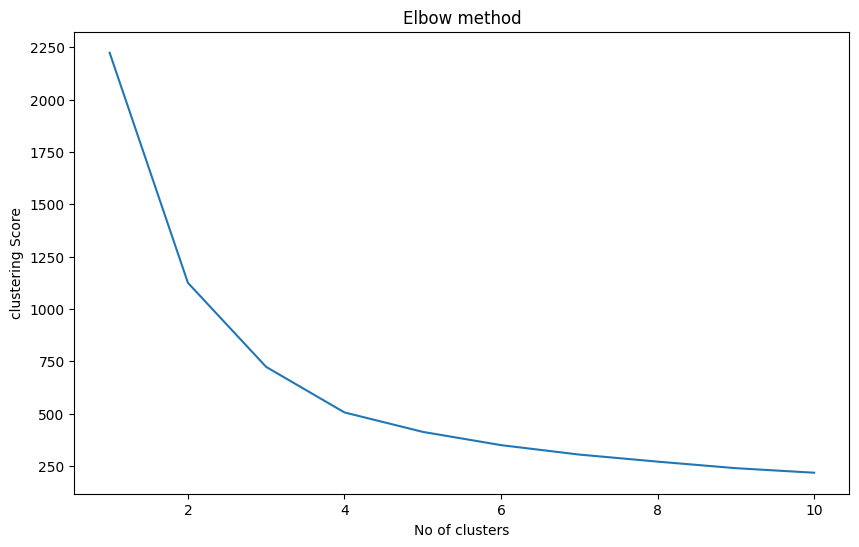

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),clustering_score)
plt.xlabel('No of clusters')
plt.ylabel('clustering Score')
plt.title("Elbow method")
plt.show()


In [45]:
## set up a model
kmeans=KMeans(n_clusters=3,random_state=23)
#fit model
kmeans.fit(X)
#predict
pred=kmeans.predict(X)

In [46]:
len(pred)

2239

In [47]:
data['cluster'] = pd.DataFrame(pred,columns = ['cluster'])
data.head(10)


,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren,Age,Spending,Seniority,cluster
0,1,0,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,66,1617,133.733333,2.0
1,1,0,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,2,69,27,105.533333,1.0
2,1,1,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,58,776,117.100000,2.0
3,1,1,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,1,39,53,103.533333,1.0
4,1,1,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,42,422,112.066667,1.0
5,1,1,62513.0,16,520,42,98,0,42,14,...,0,0,0,0,0,1,56,716,116.466667,2.0
6,1,0,55635.0,34,235,65,164,50,49,27,...,0,0,0,0,0,1,52,590,126.466667,0.0
7,1,1,33454.0,32,76,10,56,3,1,23,...,0,0,0,0,0,1,38,169,117.633333,1.0
8,1,1,30351.0,19,14,0,24,3,3,2,...,0,0,0,0,1,1,49,46,119.633333,0.0
9,1,1,5648.0,68,28,0,6,1,1,13,...,0,0,0,0,0,2,73,49,110.300000,1.0


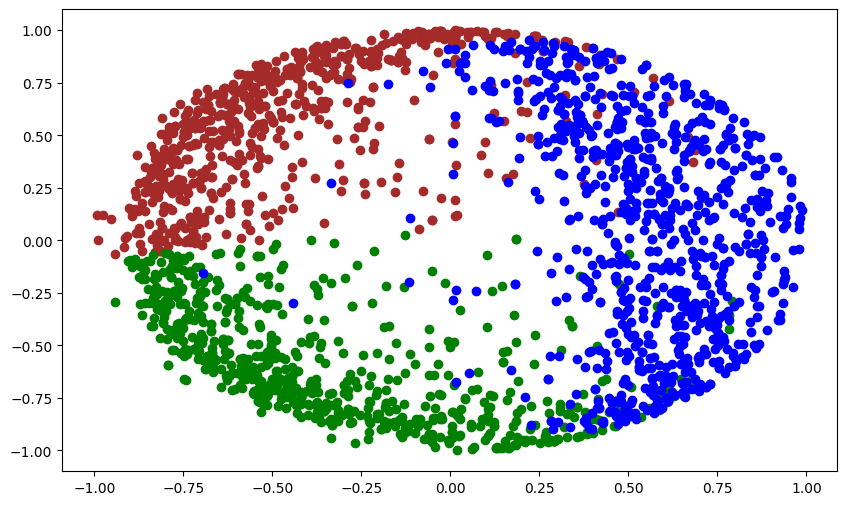

In [48]:
#Now let’s plot this data to have a look at the clustering of customers:
plt.figure(figsize = (10,6))

plt.scatter(X[pred==0.0,0],X[pred==0.0,1],c = 'brown',label = 'cluster 0')
plt.scatter(X[pred==1.0,0],X[pred==1.0,1],c = 'green',label = 'cluster 1')
plt.scatter(X[pred==2.0,0],X[pred==2.0,1],c = 'blue',label = 'cluster 2')
plt.show()

In [49]:
#Now I will prepare the data for the Apriori algorithm. Here I will be defining three segments of the customers according to the age, income and seniority:


#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)
#Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['Seniority_group'] = pd.qcut(data['Seniority'], q=4, labels=cut_labels_Seniority)
data=data.drop(columns=['Age','Income','Seniority'])
data.head()

,Education,Marital_Status,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren,Spending,cluster,Age_group,Income_group,Seniority_group
0,1,0,58,635,88,546,172,88,88,3,...,0,0,0,1,0,1617,2.0,Senior,Medium to high income,Old customers
1,1,0,38,11,1,6,2,1,6,2,...,0,0,0,0,2,27,1.0,Senior,Low to medium income,New customers
2,1,1,26,426,49,127,111,21,42,1,...,0,0,0,0,0,776,2.0,Mature,High income,Discovering customers
3,1,1,26,11,4,20,10,3,5,2,...,0,0,0,0,1,53,1.0,Adult,Low income,New customers
4,1,1,94,173,43,118,46,27,15,5,...,0,0,0,0,1,422,1.0,Adult,Medium to high income,New customers


In [50]:
#Now I will define new segments according to the spending of customers on each product which will be based on:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
data['Wines_segment'] = pd.qcut(data['Wines'][data['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(data['Fruits'][data['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(data['Meat'][data['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(data['Fish'][data['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(data['Sweets'][data['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(data['Gold'][data['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data.replace(np.nan, "Non consumer",inplace=True)
data.drop(columns=['Spending','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
data = data.astype(object)

In [51]:
data.head()

,Education,Marital_Status,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,cluster,Age_group,Income_group,Seniority_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,1,0,58,3,8,10,4,7,0,0,...,2.0,Senior,Medium to high income,Old customers,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer
1,1,0,38,2,1,1,2,5,0,0,...,1.0,Senior,Low to medium income,New customers,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer
2,1,1,26,1,8,2,10,4,0,0,...,2.0,Mature,High income,Discovering customers,Frequent consumer,Biggest consumer,Frequent consumer,Biggest consumer,Frequent consumer,Frequent consumer
3,1,1,26,2,2,0,4,6,0,0,...,1.0,Adult,Low income,New customers,Low consumer,Low consumer,Frequent consumer,Frequent consumer,Low consumer,Low consumer
4,1,1,94,5,5,3,6,5,0,0,...,1.0,Adult,Medium to high income,New customers,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer


Seniority_group,Discovering customers,Experienced customers,New customers,Old customers
Income_group,,,,
High income,138,138,154,130
Low income,131,142,140,147
Low to medium income,146,140,140,134
Medium to high income,150,134,126,149


In [63]:
pd.crosstab(data["Income_group"],data["Wines_segment"])

Wines_segment,Biggest consumer,Frequent consumer,Low consumer,Non consumer
Income_group,,,,
High income,337,218,5,0
Low income,0,138,409,13
Low to medium income,19,411,130,0
Medium to high income,200,345,14,0


In [72]:
pd.crosstab(data["Income_group"],data["Fish_segment"])

Fish_segment,Biggest consumer,Frequent consumer,Low consumer,Non consumer
Income_group,,,,
High income,310,213,9,28
Low income,7,216,228,109
Low to medium income,29,192,188,151
Medium to high income,116,285,62,96


In [66]:
pd.crosstab(data["Income_group"],data["Meat_segment"])

Meat_segment,Biggest consumer,Frequent consumer,Low consumer,Non consumer
Income_group,,,,
High income,425,130,5,0
Low income,2,191,366,1
Low to medium income,7,372,181,0
Medium to high income,124,396,39,0


In [64]:
pd.crosstab(data["Income_group"],data["Fruits_segment"])

Fruits_segment,Biggest consumer,Frequent consumer,Low consumer,Non consumer
Income_group,,,,
High income,290,235,8,27
Low income,7,180,258,115
Low to medium income,21,208,180,151
Medium to high income,135,261,56,107


In [67]:
pd.crosstab(data["Income_group"],data["Sweets_segment"])

Sweets_segment,Biggest consumer,Frequent consumer,Low consumer,Non consumer
Income_group,,,,
High income,290,227,7,36
Low income,5,202,240,113
Low to medium income,23,204,175,158
Medium to high income,130,268,49,112


In [68]:
pd.crosstab(data["Income_group"],data["Gold_segment"])

Gold_segment,Biggest consumer,Frequent consumer,Low consumer,Non consumer
Income_group,,,,
High income,247,277,21,15
Low income,18,243,285,14
Low to medium income,75,267,201,17
Medium to high income,205,265,74,15


In [51]:
#will use this algorithm to identify the biggest customer of wines
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association=data.copy() 
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()


In [ ]:
#So according to the output and overall analysis conducted on this data science project on customer personality analysis with Python, we can conclude that the biggest customers of wines are: